In [14]:
import numpy as np
import math
import numpy.linalg as linalg
import matplotlib.pyplot as plt

# Matrix definitions

### Necker cube connection matrix

In [15]:
theta = np.array([[0 ,1 ,1 ,0 ,1 ,0 ,0 ,0],[1, 0, 0, 1, 0, 1, 0, 0],[1, 0, 0, 1, 0, 0, 1, 0],[0, 1, 1, 0, 0, 0, 0, 1],[1, 0, 0, 0, 0, 1, 1, 0],
                 [0, 1, 0, 0, 1, 0, 0, 1],[0, 0, 1, 0, 1, 0, 0, 1],[0, 0, 0, 1, 0, 1, 1, 0]])

### Matrix class connections

In [16]:
C = np.array([[0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [1,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,2,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,2,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,2,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,2,1,0,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0],
              [0,0,1,1,1,0,0,0,0,2,0,2,1,0,0,0,0,0,0,0,0,0],
              [0,0,0,3,0,0,0,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0],

              [0,0,0,0,0,3,0,1,0,0,0,0,0,0,1,0,3,0,0,0,0,0],
              [0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0],
              [0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0],
              [0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0],
              [0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,0,0,0,0,0,0,0],

              [0,0,0,0,0,0,0,0,1,0,0,3,0,1,0,0,0,0,3,0,0,0],
              [0,0,0,0,0,0,0,0,0,2,0,2,1,0,0,0,0,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,2,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,2,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,2,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,2,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,1],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0],

             ])

### Transition matrix

In [17]:
def transition_matrix(J,C):
    state_ks = [12*J,6*J,4*J,0,0,2*J,-2*J,-6*J,4*J,0,4*J,-4*J,-4*J,-12*J,-6*J,-2*J,2*J,0,0,4*J,6*J,12*J]
    T = np.zeros((22,22))

    for i, k_int_state in enumerate(state_ks):
        for j, k_next_state in enumerate(state_ks):
            T[i,j] = (C[i,j]/8)*sigmoid(state_ks[j] - state_ks[i]) #k estat final menys inicial
            
    np.fill_diagonal(T, [1-sum(row) for row in T])
    
    return T

# Auxiliary functions

### Ising model probability

In [18]:
def ising_prob(state_vec,theta):
    return 1/2*(np.matmul(state_vec,np.matmul(theta,state_vec)))

### Sigmoid function

In [19]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Class detection function

#### This functions are taken from the research group project

In [8]:
"""
This function returns from which of the 22 classes is a given vector

Input:
- theta: matrix that defines the Necker cube
- state_vec: binary vector that corresponds to a cube configuration
Output:
- returns an iteger that identifies the class
"""

def current_state(state_vec,theta):
    mu = abs(sum(state_vec))
    k = ising_prob(state_vec,theta)
    if mu == 8:
        if sum(state_vec)<0:
            return 21
        return 0
    elif mu == 6:
        if sum(state_vec)<0:
            return 20
        return 1
    elif mu == 4:
        if k == 4:
            if sum(state_vec)<0:
                return 19
            return 2
        else:
            distinc_vec = np.matmul(theta,state_vec)
            if -1 in distinc_vec:
                if np.count_nonzero(distinc_vec+3) != 6:
                    if sum(state_vec)<0:
                        return 18
                    return 3
                if sum(state_vec)<0:
                    return 17
                return 4
            else:
                if sum(state_vec)<0:
                    return 17
                return 4
    elif mu == 2:
        if k == 2:
            if sum(state_vec)<0:
                return 16
            return 5
        elif k == -2:
            if sum(state_vec)<0:
                return 15
            return 6
        else:
            if sum(state_vec)<0:
                return 14
            return 7
    else:
        if k == 0:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 8
            else:
                return 9
        elif k == 4:
            return 10
        elif k == -4:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 11
            else:
                return 12
        else:
            return 13

In [9]:
"""
This function returns from which of the 14 classes is a given vector

Input:
- theta {matrix}: matrix that defines the Necker cube
- state_vec {list}: binary vector that corresponds to a cube configuration
Output:
- returns an iteger that identifies the class
"""

def current_state_14(state_vec,theta):
    #per afegir els 22 casos totals es molt facil/ sumar i veure si es positiva o negativa la suma
    mu = abs(sum(state_vec))
    k = ising_prob(state_vec,theta)
    if mu == 8:
        return 0
    elif mu == 6:
        return 1
    elif mu == 4:
        if k == 4:
            return 2
        else:
            distinc_vec = np.matmul(theta,state_vec)
            if -1 in distinc_vec:
                if np.count_nonzero(distinc_vec+3) != 6:
                    return 3
                return 4
            else:
                return 4
    elif mu == 2:
        if k == 2:
            return 5
        elif k == -2:
            return 6
        else:
            return 7
    else:
        if k == 0:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 8
            else:
                return 9
        elif k == 4:
            return 10
        elif k == -4:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 11
            else:
                return 12
        else:
            return 13

# Algorithms

### Brute force

In [10]:
"""
Computes the exact probability for each of the 256 states

Input:
- theta {matrix}: matrix that defines the Necker cube
- J {double}: coupleing strengs
Output:
- state {list}: list with the exact probabilities
"""

def prob_brute_force(theta,J):
    states = np.zeros(14)
    for i in range(256):
        vec = np.array([int(x) for x in list('{:08b}'.format(i))])
        aux_vec = 1 - vec;
        vec = vec*-1;
        state_vec = vec + aux_vec;
        #states[current_state_14(state_vec,theta)]+=1 #guardes quants cops entres a cada estat
        k = ising_prob(state_vec,theta)
        states[current_state_14(state_vec,theta)]+= np.exp(k*J)
        states/=sum(states)
    return states

### Gibbs sampling algorithms

In [11]:
"""
Computes the approximate probability for each of the 22 states using Gibbs sampling

Input:
- J {double}: coupleing strengs
- num_iter {integer}: number of iterations for the algorithm to run
Output:
- return a list of lenght 22 with the approximate probabilities
"""

def Gibbs(J,num_iter):
    #empty transition matrix
    T = np.zeros(22)
    
    #initialize random state of the cube
    vec = np.random.randint(2, size=8)
    aux_vec = 1 - vec
    vec = vec*-1
    state_vec = vec + aux_vec
    
    burn_in = 0
    for i in range(num_iter):
        new_state = np.copy(state_vec)
        q = np.random.randint(8) #generate a random number between 0 and 7
        new_state[q] = new_state[q]*-1
        p = sigmoid(J*(ising_prob(new_state,theta)-ising_prob(state_vec,theta)))
        
        #burn in
        if i < 0.2*num_iter and i < 300:
            if np.random.binomial(1, p, size=None):
                state_vec = new_state
                burn_in += 1
            continue
            
        if np.random.binomial(1, p, size=None):
            T[current_state(new_state,theta)] += 1
            state_vec = new_state
        
        else:
            T[current_state(state_vec,theta)] += 1
    return T/(num_iter-burn_in)

### Mean field algorithms

In [12]:
"""
Computes the exact approximate probability of having a front perception for the depth of the 8 nodes
Input:
- J {double}: coupleing strengs
- num_iter {integer}: number of iterations for the algorithm to run
Output:
- return a list of lenght 8 with the approximate depth probabilities
"""

def mean_field(J,num_iter):
    #initialize random state of the cube
    vec = np.random.rand(8)

    for i in range(num_iter):
        for q in range(8):
            neighbours = theta[q].astype(dtype=bool)
            vec[q] = sigmoid(2*J*sum(2*vec[neighbours]-1))
    return vec

# Algorithm analysis

### Gibbs lambda analysis 

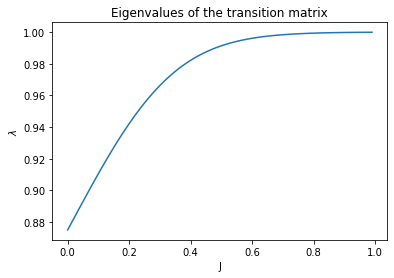

In [20]:
transition_matrix(1,C)

lambdas = []
J = [i for i in np.arange(0,1,0.01)]
for j in J:
    T = transition_matrix(j,C)
    eigenValues, eigenVectors = linalg.eig(T)
    idx = eigenValues.argsort()[::-1] #l'ultim que se'n va a 0 és el més gordo
    eigenValues = eigenValues[idx] 
    lambdas.append(eigenValues[1])
plt.plot(J,lambdas)
plt.xlabel('J')
plt.ylabel('$\lambda$')
  
# giving a title to my graph
plt.title('Eigenvalues of the transition matrix')
  
# function to show the plot
plt.show()

### Gibbs $\tau$ analysis

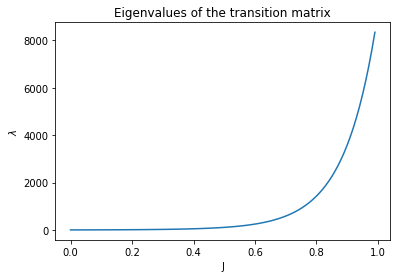

In [45]:
transition_matrix(1,C)

lambdas = []
J = [i for i in np.arange(0,1,0.01)]
for j in J:
    T = transition_matrix(j,C)
    eigenValues, eigenVectors = linalg.eig(T)
    idx = eigenValues.argsort()[::-1] #l'ultim que se'n va a 0 és el més gordo
    eigenValues = eigenValues[idx] 
    lambdas.append(eigenValues[1])
plt.plot(J,-1/np.log(lambdas))
plt.xlabel('J')
plt.ylabel('$\lambda$')
  
# giving a title to my graph
plt.title('Eigenvalues of the transition matrix')
  
# function to show the plot
plt.show()

### Mean filed solutions

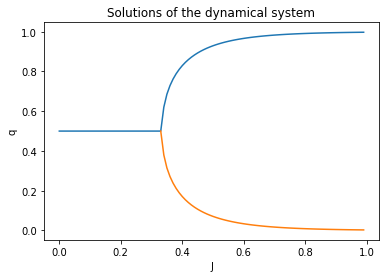

In [21]:
from scipy.optimize import fsolve
import numpy as np
l = []
for j in np.arange(0,1,0.01):
    q = lambda q: sigmoid(6*j*(2*q-1)) - q
    l.append(fsolve(q,1))
    
plt.plot(np.arange(0,1,0.01),l)
plt.plot(np.arange(0.33,1,0.01),1-np.array(l[33:]))
plt.xlabel('J')
plt.ylabel('q')
  
# giving a title to my graph
plt.title('Solutions of the dynamical system')
  
# function to show the plot
plt.show()

# Results

### Gibbs simulation code

In [39]:
# 100000 iterations

In [32]:
L_100 = []
for j in np.arange(0,1,0.1):
    L_100.append(Gibbs(j,100000))

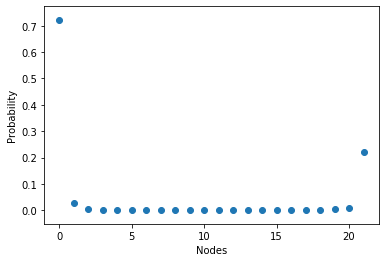

In [36]:
states = np.arange(22)
plt.scatter(states,L_100[9])
plt.xlabel('Nodes')
plt.ylabel('Probability')
  
# function to show the plot
plt.show()

In [40]:
# 5000 iterations

In [37]:
L = []
for j in np.arange(0,1,0.1):
    L.append(Gibbs(j,5000))

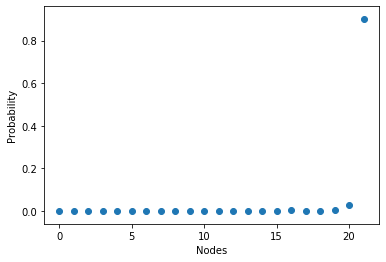

In [38]:
states = np.arange(22)
plt.scatter(states,L[9])
plt.xlabel('Nodes')
plt.ylabel('Probability')
  
# function to show the plot
plt.show()

### Mean field tables

In [31]:
l = []
for j in np.arange(0,1,0.1):
    l.append(mean_field(j,300))
t = []
for j in np.arange(0,1,0.1):
    t.append(mean_field(j,5000))

In [41]:
t

[array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.17071517, 0.17071517, 0.17071517, 0.17071517, 0.17071517,
        0.17071517, 0.17071517, 0.17071517]),
 array([0.07072018, 0.07072018, 0.07072018, 0.07072018, 0.07072018,
        0.07072018, 0.07072018, 0.07072018]),
 array([0.96635879, 0.96635879, 0.96635879, 0.96635879, 0.96635879,
        0.96635879, 0.96635879, 0.96635879]),
 array([0.98299619, 0.98299619, 0.98299619, 0.98299619, 0.98299619,
        0.98299619, 0.98299619, 0.98299619]),
 array([0.99111729, 0.99111729, 0.99111729, 0.99111729, 0.99111729,
        0.99111729, 0.99111729, 0.99111729]),
 array([0.00473086, 0.00473086, 0.00473086, 0.00473086, 0.00473086,
        0.00473086, 0.00473086, 0.00473086])]